In [20]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import re
import emoji
import time
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import model_selection, naive_bayes, svm
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn import utils
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    roc_auc_score, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report
)   
np.random.seed(500) 

In [21]:
def Metric(y_true, y_pred):
    """
    compute and show the classification result
    """
    accuracy = accuracy_score(y_true, y_pred)
    macro_precision = precision_score(y_true, y_pred, average='macro')
    macro_recall = recall_score(y_true, y_pred, average='macro')
    weighted_f1 = f1_score(y_true, y_pred, average='macro')
    target_names = ['class_0', 'class_1']
    report = classification_report(y_true, y_pred, target_names=target_names, digits=3)

    print('Accuracy: {:.1%}\nPrecision: {:.1%}\nRecall: {:.1%}\nF1: {:.1%}'.format(accuracy, macro_precision,
                                            macro_recall, weighted_f1))
    print("classification_report:\n")
    print(report)

# Importing data 

In [2]:
unprocessed_stocks = pd.read_csv("./data/stock_db.csv")
unprocessed_crypto = pd.read_csv("./data/crypto_db.csv")
unprocessed_stocks

,symbol,sentiment,message,message_id
0,AAPL,Bullish,$AAPL ain’t nobody selling. Shorts need to cov...,304543565
1,AAPL,Bullish,$QRVO today watch lists $CCIV $AAPL $RBLX,304543491
2,AAPL,Bullish,$AAPL could you imagine if we see $133+ by Fri...,304542855
3,AAPL,Bullish,$AAPL will revisit mid 126.xx\nWay too early i...,304542796
4,AAPL,Bullish,$AAPL \n\nBears are cocksuckers,304542546
...,...,...,...,...
291563,FB,Bullish,$FB I&#39;m excited about next week,19228876
291564,FB,Bullish,@flavisam_letstradeshares Agree re $fb,19228800
291565,FB,Bullish,$FB looking to test the 52w high at 58.96 (Jan9),19228632
291566,FB,Bullish,Recent sold $BBRY $IRWD $OREX $ACHN $LNKD $ANG...,19228264


In [3]:
print(len(unprocessed_stocks))
print(len(unprocessed_crypto))

291568
305974


# Visualizing the data

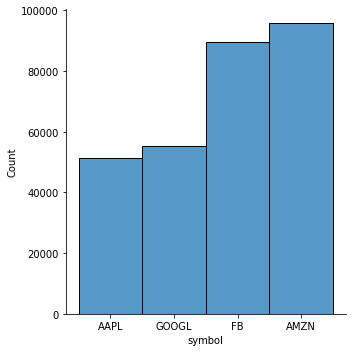

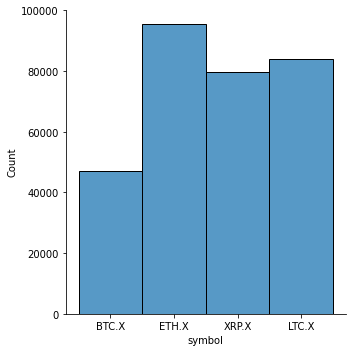

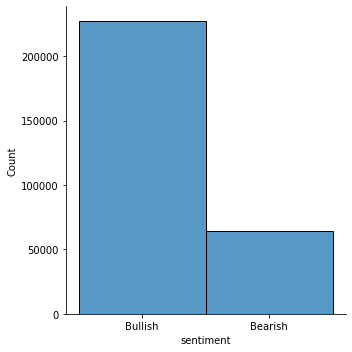

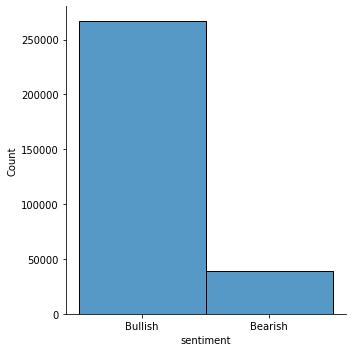

In [4]:
sns.displot(unprocessed_stocks, x="symbol")
sns.displot(unprocessed_crypto, x="symbol")
sns.displot(unprocessed_stocks, x="sentiment")
sns.displot(unprocessed_crypto, x="sentiment")

# Preprocessing
Here we define our preprocess function, one needs to specify which preprocessing functions he wants to be applied to the data messages



In [5]:
from preprocessing import preprocess

[nltk_data] Downloading package words to /Users/aminelz/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/aminelz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
all_processed = pd.concat([unprocessed_crypto, unprocessed_stocks], ignore_index=True)
all_processed

,symbol,sentiment,message,message_id
0,BTC.X,Bullish,$BTC.X go go you beautiful bastard,304543745
1,BTC.X,Bullish,$ZIL.X $NIO $SSNLF $ETH.X $BTC.X \n\nhttps://t...,304543536
2,BTC.X,Bullish,$BTC.X Bitcoin is like real estate in Palm Bea...,304543059
3,BTC.X,Bearish,"$BTC.X dump city, dump dump city",304542929
4,BTC.X,Bullish,$AABB this baby about to 🚀🚀🚀$RIOT $MARA $FCEL ...,304542879
...,...,...,...,...
597537,FB,Bullish,$FB I&#39;m excited about next week,19228876
597538,FB,Bullish,@flavisam_letstradeshares Agree re $fb,19228800
597539,FB,Bullish,$FB looking to test the 52w high at 58.96 (Jan9),19228632
597540,FB,Bullish,Recent sold $BBRY $IRWD $OREX $ACHN $LNKD $ANG...,19228264


In [32]:
all_processed['symbol'].value_counts()

AMZN     95717
ETH.X    95360
FB       89417
LTC.X    83861
XRP.X    79635
GOOGL    55188
AAPL     51246
BTC.X    47118
Name: symbol, dtype: int64

In [33]:
all_processed['sentiment'].value_counts()

Bullish    494034
Bearish    103508
Name: sentiment, dtype: int64

In [7]:
%%time
all_processed = preprocess(all_processed, punc=False, lower=True, lemma=False, em_rep=True, num=False, stopw=False, misspell=False)
all_processed


CPU times: user 5min 24s, sys: 610 ms, total: 5min 25s
Wall time: 5min 27s


,symbol,sentiment,message,message_id
0,BTC.X,Bullish,$btc.x go go you beautiful bastard,304543745
1,BTC.X,Bullish,$zil.x $nio $ssnlf $eth.x $btc.x https://thefi...,304543536
2,BTC.X,Bullish,$btc.x bitcoin is like real estate in palm bea...,304543059
3,BTC.X,Bearish,"$btc.x dump city, dump dump city",304542929
4,BTC.X,Bullish,$aabb this baby about to :rocket: :rocket: :ro...,304542879
...,...,...,...,...
597537,FB,Bullish,$fb i&#39;m excited about next week,19228876
597538,FB,Bullish,@flavisam_letstradeshares agree re $fb,19228800
597539,FB,Bullish,$fb looking to test the 52w high at 58.96 (jan9),19228632
597540,FB,Bullish,recent sold $bbry $irwd $orex $achn $lnkd $ang...,19228264


In [8]:
all_processed['sentiment'].value_counts()

Bullish    494034
Bearish    103508
Name: sentiment, dtype: int64

In [9]:
balanced_processed = all_processed.groupby('sentiment').apply(lambda x:x.sample(103508)).reset_index(drop=True)
print(balanced_processed['sentiment'].value_counts())


Bullish    103508
Bearish    103508
Name: sentiment, dtype: int64


In [10]:
X_train, X_test, y_train, y_test = train_test_split(balanced_processed['message'], balanced_processed['sentiment'], test_size=0.3, random_state=500, stratify=balanced_processed['sentiment'])



In [11]:
%%time
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(X_train)
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

CPU times: user 6.79 s, sys: 114 ms, total: 6.9 s
Wall time: 6.91 s


# Naive Bayes

MNB Accuracy Score->  77.22727638676436
Accuracy: 77.2%
Precision: 77.2%
Recall: 77.2%
F1: 77.2%
classification_report:

              precision    recall  f1-score   support

     class_0      0.786     0.765     0.775     31878
     class_1      0.759     0.780     0.769     30227

    accuracy                          0.772     62105
   macro avg      0.772     0.772     0.772     62105
weighted avg      0.773     0.772     0.772     62105

CPU times: user 5.93 s, sys: 350 ms, total: 6.28 s
Wall time: 6.56 s


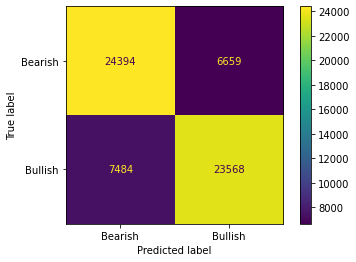

In [23]:
%%time
MNB = MultinomialNB()
MNB.fit(Train_X_Tfidf,y_train)
predictions_MNB = MNB.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("MNB Accuracy Score-> ",accuracy_score(predictions_MNB, y_test)*100)
plot_confusion_matrix(MNB, Test_X_Tfidf, y_test)  
Metric(predictions_MNB, y_test) 

# Logistic Regression

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM Accuracy Score->  78.59270590129618
Accuracy: 78.6%
Precision: 78.6%
Recall: 78.6%
F1: 78.6%
classification_report:

              precision    recall  f1-score   support

     class_0      0.781     0.789     0.785     30758
     class_1      0.791     0.783     0.787     31347

    accuracy                          0.786     62105
   macro avg      0.786     0.786     0.786     62105
weighted avg      0.786     0.786     0.786     62105

CPU times: user 13.7 s, sys: 1.04 s, total: 14.7 s
Wall time: 9.61 s


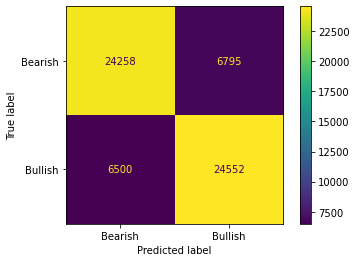

In [24]:
%%time
LR = LogisticRegression()
LR.fit(Train_X_Tfidf, y_train)
predictions_LR = LR.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score-> ",accuracy_score(predictions_LR, y_test)*100)
plot_confusion_matrix(LR, Test_X_Tfidf, y_test)  
Metric(predictions_LR, y_test) 

# KNN 

SVM Accuracy Score->  74.07938169229531
Accuracy: 74.1%
Precision: 74.1%
Recall: 74.1%
F1: 74.1%
classification_report:

              precision    recall  f1-score   support

     class_0      0.765     0.730     0.747     32569
     class_1      0.716     0.753     0.734     29536

    accuracy                          0.741     62105
   macro avg      0.741     0.741     0.741     62105
weighted avg      0.742     0.741     0.741     62105

CPU times: user 9min 19s, sys: 2min 20s, total: 11min 40s
Wall time: 12min 9s


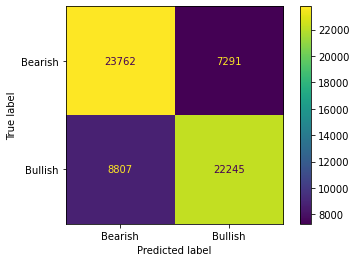

In [25]:
%%time
KNN = KNeighborsClassifier()
KNN.fit(Train_X_Tfidf, y_train)
predictions_KNN = KNN.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score-> ",accuracy_score(predictions_KNN, y_test)*100)
plot_confusion_matrix(KNN, Test_X_Tfidf, y_test) 
Metric(predictions_KNN, y_test) 

# SVC

SVM Accuracy Score->  78.82779164318492
Accuracy: 78.8%
Precision: 78.8%
Recall: 78.8%
F1: 78.8%
classification_report:

              precision    recall  f1-score   support

     class_0      0.789     0.788     0.788     31072
     class_1      0.788     0.788     0.788     31033

    accuracy                          0.788     62105
   macro avg      0.788     0.788     0.788     62105
weighted avg      0.788     0.788     0.788     62105

CPU times: user 8.88 s, sys: 184 ms, total: 9.07 s
Wall time: 9.31 s


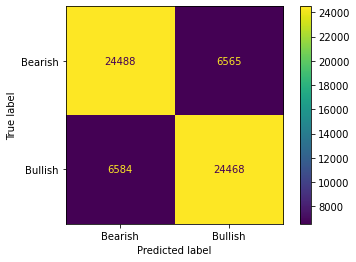

In [26]:
%%time
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.LinearSVC()
SVM.fit(Train_X_Tfidf,y_train)
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score-> ",accuracy_score(predictions_SVM, y_test)*100)
plot_confusion_matrix(SVM, Test_X_Tfidf, y_test)  
Metric(predictions_SVM, y_test) 

SVM Accuracy Score->  79.143386200789
Accuracy: 79.1%
Precision: 79.1%
Recall: 79.1%
F1: 79.1%
classification_report:

              precision    recall  f1-score   support

     class_0      0.786     0.795     0.790     30704
     class_1      0.797     0.788     0.793     31401

    accuracy                          0.791     62105
   macro avg      0.791     0.791     0.791     62105
weighted avg      0.791     0.791     0.791     62105

CPU times: user 1h 28min 45s, sys: 29.2 s, total: 1h 29min 14s
Wall time: 1h 29min 58s


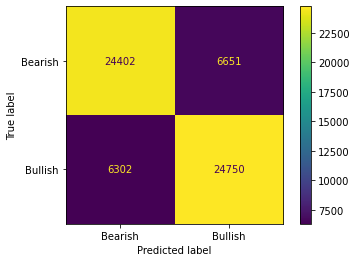

In [27]:
%%time
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(kernel='linear')
SVM.fit(Train_X_Tfidf,y_train)
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score-> ",accuracy_score(predictions_SVM, y_test)*100)
plot_confusion_matrix(SVM, Test_X_Tfidf, y_test)  
Metric(predictions_SVM, y_test) 

SVM Accuracy Score->  50.247162064246034
Accuracy: 50.2%
Precision: 50.2%
Recall: 50.2%
F1: 50.2%
classification_report:

              precision    recall  f1-score   support

     class_0      0.499     0.502     0.501     30854
     class_1      0.506     0.502     0.504     31251

    accuracy                          0.502     62105
   macro avg      0.502     0.502     0.502     62105
weighted avg      0.502     0.502     0.502     62105

CPU times: user 5.82 s, sys: 20 ms, total: 5.84 s
Wall time: 5.86 s


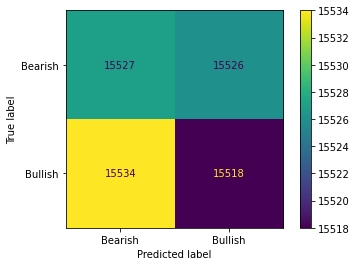

In [31]:
%%time
from sklearn.dummy import DummyClassifier
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
DC = DummyClassifier()
DC.fit(Train_X_Tfidf,y_train)
predictions_DC = DC.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score-> ",accuracy_score(predictions_DC, y_test)*100)
plot_confusion_matrix(DC, Test_X_Tfidf, y_test)  
Metric(predictions_DC, y_test) 